In [ ]:
import xarray as xr

working_folder = "/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_4/"
nasa_l3= xr.open_dataset(f"{working_folder}/time_series/WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True).data_vars['snow_cover_fraction']
mf_l3 = xr.open_dataset(f"{working_folder}/time_series/WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True).data_vars['snow_cover_fraction']
nasa_pseudo_l3=xr.open_dataset(f"{working_folder}/time_series/WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True).data_vars['snow_cover_fraction']
s2_theia=xr.open_dataset(f"{working_folder}/time_series/WY_2023_2024_s2_theia_res_375m.nc", decode_cf=True).data_vars['snow_cover_fraction']

analysis_folder = '/home/imperatoren/work/VIIRS_S2_comparison/viirsnow/output_folder/version_4/analyses/confusion_table'
nasa_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/confusion_table_WY_2023_2024_SNPP_nasa_l3_res_375m.nc", decode_cf=True)
mf_metrics_ds = xr.open_dataset(f"{analysis_folder}/confusion_table_WY_2023_2024_SNPP_meteofrance_l3_res_375m.nc", decode_cf=True)
nasa_pseudo_l3_metrics_ds = xr.open_dataset(f"{analysis_folder}/confusion_table_WY_2023_2024_SNPP_nasa_pseudo_l3_res_375m.nc", decode_cf=True)

Météo-France

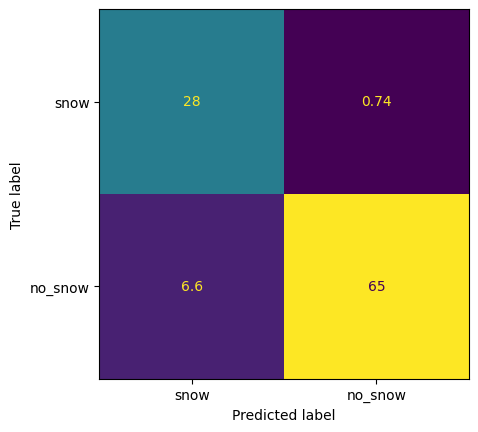

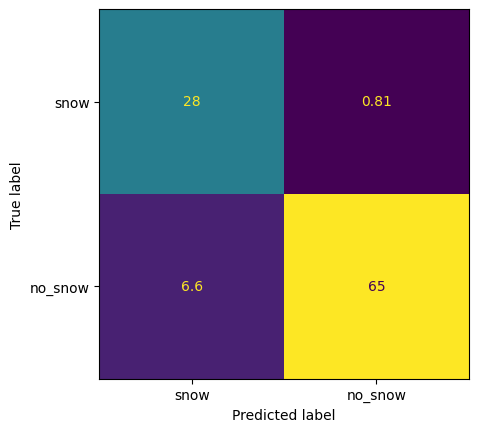

In [ ]:
from evaluations.confusion_table import plot_confusion_table

import numpy as np


test_ts = mf_l3.sel(time='2023-12')
ref_ts = s2_theia.sel(time='2023-12')
common_days = np.intersect1d(test_ts["time"], ref_ts["time"])
test_ts = test_ts.sel(time=common_days)
ref_ts = ref_ts.sel(time=common_days)

test_no_snow = (test_ts == 0).astype(np.uint8) + (test_ts == 215).astype(np.uint8) 
ref_no_snow = (ref_ts == 0).astype(np.uint8)
test_snow = (test_ts > 0).astype(np.uint8) & (test_ts<=200).astype(np.uint8)
test_snow = test_snow + (test_ts==210).astype(np.uint8)
ref_snow = (ref_ts > 0).astype(np.uint8) & (ref_ts<=100).astype(np.uint8)
test_snow = test_snow.astype(bool)
ref_snow = ref_snow.astype(bool)
test_no_snow = test_no_snow.astype(bool)
ref_no_snow = ref_no_snow.astype(bool)
conf_matrix_ds = xr.Dataset(
    {
    'true_positive': test_snow & ref_snow,
    'true_negative': test_no_snow & ref_no_snow,
    'false_positive': test_snow & ref_no_snow,
    'false_negative': test_no_snow & ref_snow,
    }
)
plot_confusion_table(conf_matrix_ds)
plot_confusion_table(mf_metrics_ds.sel(time='2023-12'))

NASA L3

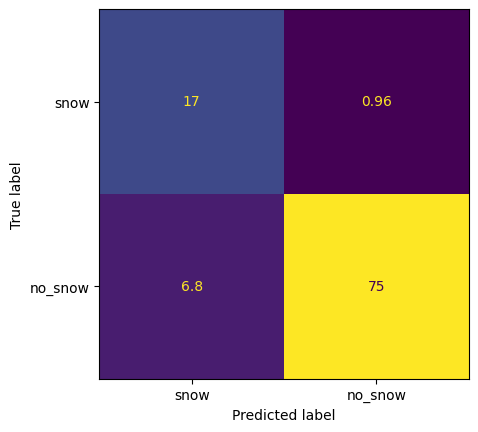

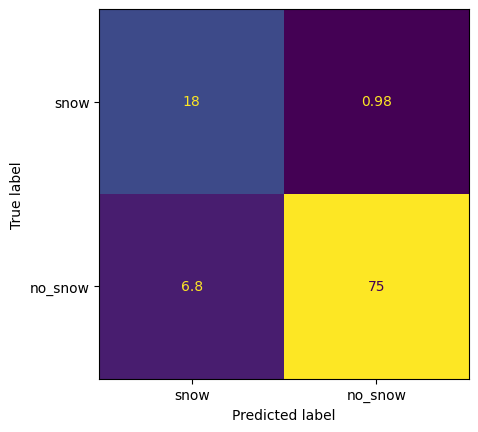

In [46]:

test_ts = nasa_l3.sel(time='2023-12')
ref_ts = s2_theia.sel(time='2023-12')
common_days = np.intersect1d(test_ts["time"], ref_ts["time"])
test_ts = test_ts.sel(time=common_days)
ref_ts = ref_ts.sel(time=common_days)

test_no_snow = (test_ts == 0).astype(np.uint8)
ref_no_snow = (ref_ts == 0).astype(np.uint8)
test_snow = (test_ts > 0).astype(np.uint8) & (test_ts<=100).astype(np.uint8)
ref_snow = (ref_ts > 0).astype(np.uint8) & (ref_ts<=100).astype(np.uint8)
test_snow = test_snow.astype(bool)
ref_snow = ref_snow.astype(bool)
test_no_snow = test_no_snow.astype(bool)
ref_no_snow = ref_no_snow.astype(bool)
conf_matrix_ds = xr.Dataset(
    {
    'true_positive': test_snow & ref_snow,
    'true_negative': test_no_snow & ref_no_snow,
    'false_positive': test_snow & ref_no_snow,
    'false_negative': test_no_snow & ref_snow,
    }
)
plot_confusion_table(conf_matrix_ds)
plot_confusion_table(nasa_l3_metrics_ds.sel(time='2023-12'))

NASA pseudo L3

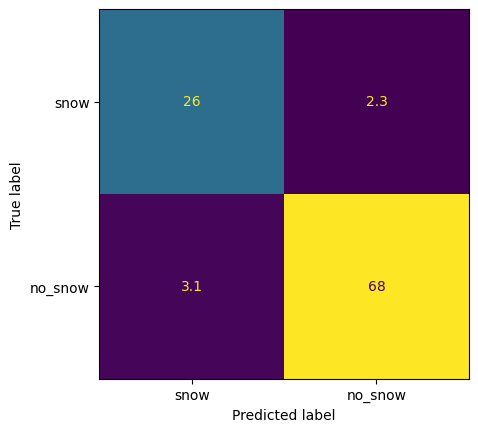

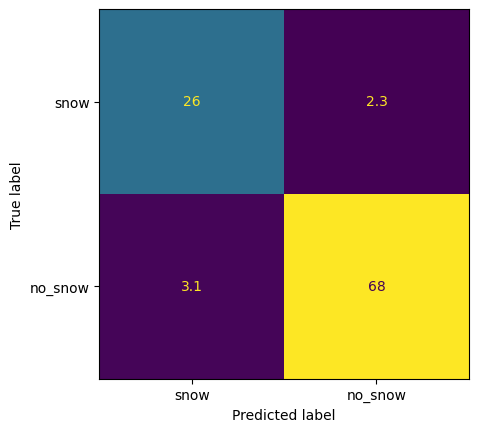

In [47]:

test_ts = nasa_pseudo_l3.sel(time='2023-12')
ref_ts = s2_theia.sel(time='2023-12')
common_days = np.intersect1d(test_ts["time"], ref_ts["time"])
test_ts = test_ts.sel(time=common_days)
ref_ts = ref_ts.sel(time=common_days)

test_no_snow = (test_ts == 0).astype(np.uint8)
ref_no_snow = (ref_ts == 0).astype(np.uint8)
test_snow = (test_ts > 0).astype(np.uint8) & (test_ts<=100).astype(np.uint8)
ref_snow = (ref_ts > 0).astype(np.uint8) & (ref_ts<=100).astype(np.uint8)
test_snow = test_snow.astype(bool)
ref_snow = ref_snow.astype(bool)
test_no_snow = test_no_snow.astype(bool)
ref_no_snow = ref_no_snow.astype(bool)
conf_matrix_ds = xr.Dataset(
    {
    'true_positive': test_snow & ref_snow,
    'true_negative': test_no_snow & ref_no_snow,
    'false_positive': test_snow & ref_no_snow,
    'false_negative': test_no_snow & ref_snow,
    }
)
plot_confusion_table(conf_matrix_ds)
plot_confusion_table(nasa_pseudo_l3_metrics_ds.sel(time='2023-12'))

In [48]:
dem_path="/home/imperatoren/work/VIIRS_S2_comparison/data/auxiliary/dem/DEM_MSF_UTM31_375m_lanczos.tif"
dem = xr.open_dataarray(dem_path).sel(band=1)
dem_mask = dem>2100

test_ts = mf_l3.sel(time='2023-12').where(dem_mask)

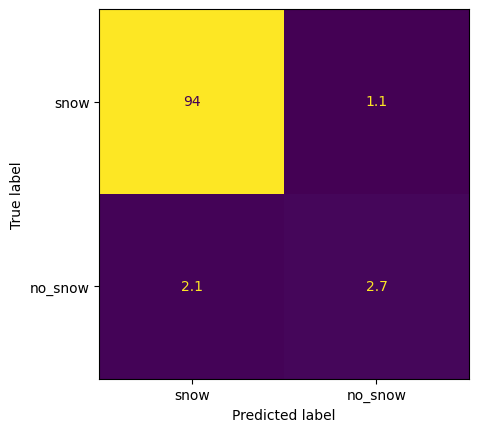

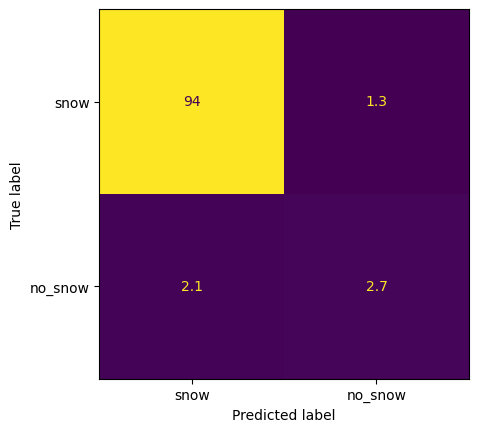

In [59]:
# Altitude test

dem_path="/home/imperatoren/work/VIIRS_S2_comparison/data/auxiliary/dem/DEM_MSF_UTM31_375m_lanczos.tif"
dem = xr.open_dataarray(dem_path).sel(band=1)
dem_mask = dem>=2100

test_ts = mf_l3.sel(time='2023-12').where(dem_mask)
ref_ts = s2_theia.sel(time='2023-12').where(dem_mask)

common_days = np.intersect1d(test_ts["time"], ref_ts["time"])
test_ts = test_ts.sel(time=common_days)
ref_ts = ref_ts.sel(time=common_days)

test_no_snow = (test_ts == 0).astype(np.uint8) + (test_ts == 215).astype(np.uint8) 
ref_no_snow = (ref_ts == 0).astype(np.uint8)
test_snow = (test_ts > 0).astype(np.uint8) & (test_ts<=200).astype(np.uint8)
test_snow = test_snow + (test_ts==210).astype(np.uint8)
ref_snow = (ref_ts > 0).astype(np.uint8) & (ref_ts<=100).astype(np.uint8)
test_snow = test_snow.astype(bool)
ref_snow = ref_snow.astype(bool)
test_no_snow = test_no_snow.astype(bool)
ref_no_snow = ref_no_snow.astype(bool)
conf_matrix_ds = xr.Dataset(
    {
    'true_positive': test_snow & ref_snow,
    'true_negative': test_no_snow & ref_no_snow,
    'false_positive': test_snow & ref_no_snow,
    'false_negative': test_no_snow & ref_snow,
    }
)
plot_confusion_table(conf_matrix_ds)
plot_confusion_table(mf_metrics_ds.sel(time='2023-12', altitude_bins=slice(2700,None)))